<a href="https://colab.research.google.com/github/yashsinghkvojhar/yashsinghkvojhar/blob/main/ebay_iphone_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
iphone11 = pd.read_csv('ebay_iphone_11_pro_max.csv')
iphone12 = pd.read_csv('ebay_iphone_12_pro_max.csv')
iphone13 = pd.read_csv('ebay_iphone_13_pro_max.csv')
iphone14 = pd.read_csv('ebay_iphone_14_pro_max.csv')
iphonexr = pd.read_csv('ebay_iphone_xr.csv')

In [5]:
iphone11.head()

,Title,Price
0,NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB...,$310.25
1,Apple iPhone 11 Pro Max (A2161) 64GB Space Gra...,$361.25
2,Apple iPhone 11 PRO MAX 64GB 256GB 512GB (UNLO...,$467.95 to $568.95
3,NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB...,$306.00
4,Apple iPhone 11 Pro Max - 256GB - Gold (Unlock...,$300.00


In [6]:
iphone12.head()

,Title,Price
0,Apple iPhone 12 Pro Max 5G A2342 - 128GB 256GB...,$549.00 to $579.00
1,Apple iPhone 12 Pro Max - 128GB 256GB 512GB - ...,$510.00 to $644.00
2,Apple iPhone 12 Pro Max 512GB Unlocked AT&T T-...,$554.95
3,Apple iPhone 12 Pro Max 128/256/512 GSM Unlock...,$509.99 to $639.99
4,Apple iPhone 12 Pro Max - 128GB - Gold (Unlock...,$186.50


* All the tables have 2 columns Title and Price

In [7]:
iphone11.describe()


,Title,Price
count,192,192
unique,98,80
top,Apple iPhone 11 Pro Max - 256GB - Gold (AT&T),$449.99
freq,4,10


In [8]:
iphone12.describe()


,Title,Price
count,288,288
unique,139,110
top,Apple iPhone 12 Pro Max - 128GB - Pacific Blue...,$499.99
freq,7,13


In [9]:
iphone13.describe()


,Title,Price
count,189,189
unique,126,96
top,iPhone 13 Pro Max Unlocked (CDMA + GSM) 512GB ...,$730.00
freq,3,22


In [10]:
iphone14.describe()


,Title,Price
count,1023,1023
unique,719,474
top,Apple iPhone 14 Pro Max - 128GB - Deep Purple ...,$900.00
freq,20,27


In [11]:
iphonexr.describe()

,Title,Price
count,480,480
unique,387,144
top,UNOPENED Apple iPhone XR Unlocked 128GB White ...,$395.79 to $466.79
freq,4,24


* Both columns are string type and categorical columns

In [12]:
def preprocess_price(price_str):
    prices = price_str.replace('$', '').split(' to ')
    return sum(float(price.replace(',','')) for price in prices) / len(prices)

In [13]:
iphone11['Price']=iphone11['Price'].apply(preprocess_price)

In [14]:
# find price like above for 12,13,14 and xr
iphone12['Price']=iphone12['Price'].apply(preprocess_price)
iphone13['Price']=iphone13['Price'].apply(preprocess_price)
iphone14['Price']=iphone14['Price'].apply(preprocess_price)
iphonexr['Price']=iphonexr['Price'].apply(preprocess_price)

In [15]:
iphone11['model']='iphone11'
iphone12['model']='iphone12'
iphone13['model']='iphone13'
iphone14['model']='iphone14'
iphonexr['model']='iphonexr'

In [16]:
iphone11.head()

,Title,Price,model
0,NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB...,310.25,iphone11
1,Apple iPhone 11 Pro Max (A2161) 64GB Space Gra...,361.25,iphone11
2,Apple iPhone 11 PRO MAX 64GB 256GB 512GB (UNLO...,518.45,iphone11
3,NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB...,306.00,iphone11
4,Apple iPhone 11 Pro Max - 256GB - Gold (Unlock...,300.00,iphone11


In [17]:
models=['iphone11','iphone12','iphone13','iphone14','iphonexr']
avg_df=pd.DataFrame()


In [18]:
avgs=[]
avgs.append(iphone11['Price'].mean())
avgs.append(iphone12['Price'].mean())
avgs.append(iphone13['Price'].mean())
avgs.append(iphone14['Price'].mean())
avgs.append(iphonexr['Price'].mean())
avgs

[429.35510416666665,
 563.86109375,
 714.5543915343917,
 1022.2601955034213,
 348.9495833333333]

In [19]:
for i in range(len(models)):
    new_row={'model':models[i],'avg_price':avgs[i]}
    avg_df=pd.concat([avg_df,pd.DataFrame([new_row])],ignore_index=True)

In [20]:
avg_df=avg_df.sort_values(by='avg_price',ascending=False)
avg_df

,model,avg_price
3,iphone14,1022.260196
2,iphone13,714.554392
1,iphone12,563.861094
0,iphone11,429.355104
4,iphonexr,348.949583


In [21]:
avgs.sort(reverse=True)
avgs

[1022.2601955034213,
 714.5543915343917,
 563.86109375,
 429.35510416666665,
 348.9495833333333]

In [22]:
per_diff=[]
for i in range(len(avgs)):
    if i<len(avgs)-1:
      per_diff.append(round(((avgs[i]-avgs[i+1])/avgs[i])*100,0))
    else:
      per_diff.append(0)

per_diff

[30.0, 21.0, 24.0, 19.0, 0]

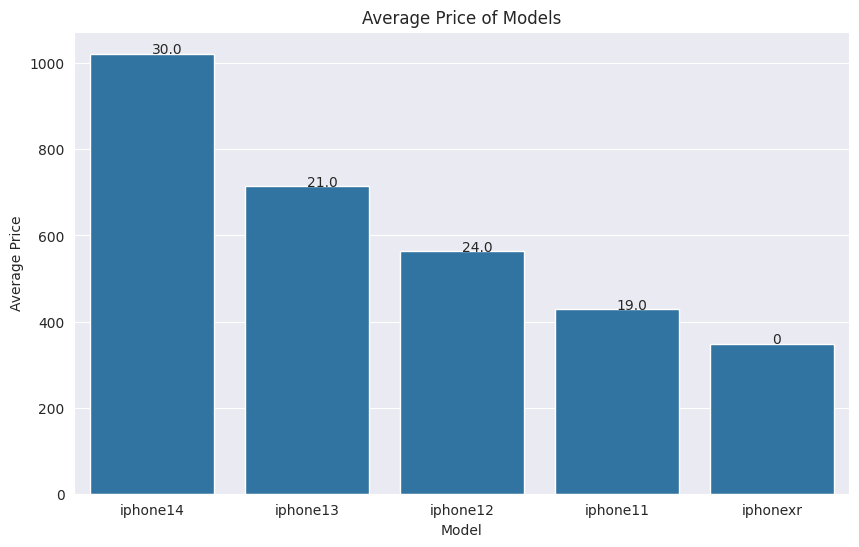

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],per_diff[i])

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='model',y='avg_price',data=avg_df)
addlabels(models,avgs)
plt.title('Average Price of Models')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.show()

In [24]:
import numpy as np
np.mean(per_diff)


18.8

In [25]:
final_pricing=avgs[0]+((avgs[0]*18.8)/100)

In [26]:
print('price for next product:',final_pricing)

price for next product: 1214.4451122580645


In [27]:
iphone11[['Model_name','Storage','color','1','2']]=iphone11['Title'].str.split('-',n=4,expand=True)

In [28]:
iphone11

,Title,Price,model,Model_name,Storage,color,1,2
0,NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB...,310.25,iphone11,NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB...,SEE DESCRIPTION,None,None,None
1,Apple iPhone 11 Pro Max (A2161) 64GB Space Gra...,361.25,iphone11,Apple iPhone 11 Pro Max (A2161) 64GB Space Gra...,None,None,None,None
2,Apple iPhone 11 PRO MAX 64GB 256GB 512GB (UNLO...,518.45,iphone11,Apple iPhone 11 PRO MAX 64GB 256GB 512GB (UNLO...,None,None,None,None
3,NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB...,306.00,iphone11,NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB...,SEE DESCRIPTION,None,None,None
4,Apple iPhone 11 Pro Max - 256GB - Gold (Unlock...,300.00,iphone11,Apple iPhone 11 Pro Max,256GB,Gold (Unlocked) (Read Description) DD1067,None,None
...,...,...,...,...,...,...,...,...
187,Apple iPhone 11 Pro Max 256GB Gold Unlocked Go...,419.99,iphone11,Apple iPhone 11 Pro Max 256GB Gold Unlocked Go...,None,None,None,None
188,Apple iPhone 11 Pro Max 64GB Space Gray Unlock...,399.99,iphone11,Apple iPhone 11 Pro Max 64GB Space Gray Unlock...,None,None,None,None
189,Apple iPhone 11 Pro Max - 64GB - (Unlocked) A2...,349.00,iphone11,Apple iPhone 11 Pro Max,64GB,(Unlocked) A2161 (CDMA + GSM)NO FACE ID,None,None
190,Apple iPhone 11 Pro Max - 64GB - Factory Unloc...,549.99,iphone11,Apple iPhone 11 Pro Max,64GB,Factory Unlocked,Good Condition,None


In [29]:
iphone11['Model_name'][0]

'NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB Space Gray Unlocked Gsm Good'

In [30]:
iphone11['Title'][0]

'NEW LISTINGApple iPhone 11 Pro Max(A2161) 64GB Space Gray Unlocked Gsm Good-SEE DESCRIPTION'